In [ ]:
!nvidia-smi

Thu Nov 14 15:02:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

##Training

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kX1T67tvKBnWqTL6ql1I")
project = rf.workspace("phoenix-jsc7c").project("test-gzrpx")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test-2 in yolov8:: 100%|██████████| 1554/1554 [00:00<00:00, 3533.54it/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=800 plots=True

/content
100% 49.7M/49.7M [00:00<00:00, 263MB/s]
New https://pypi.org/project/ultralytics/8.3.31 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/test-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, re

/content


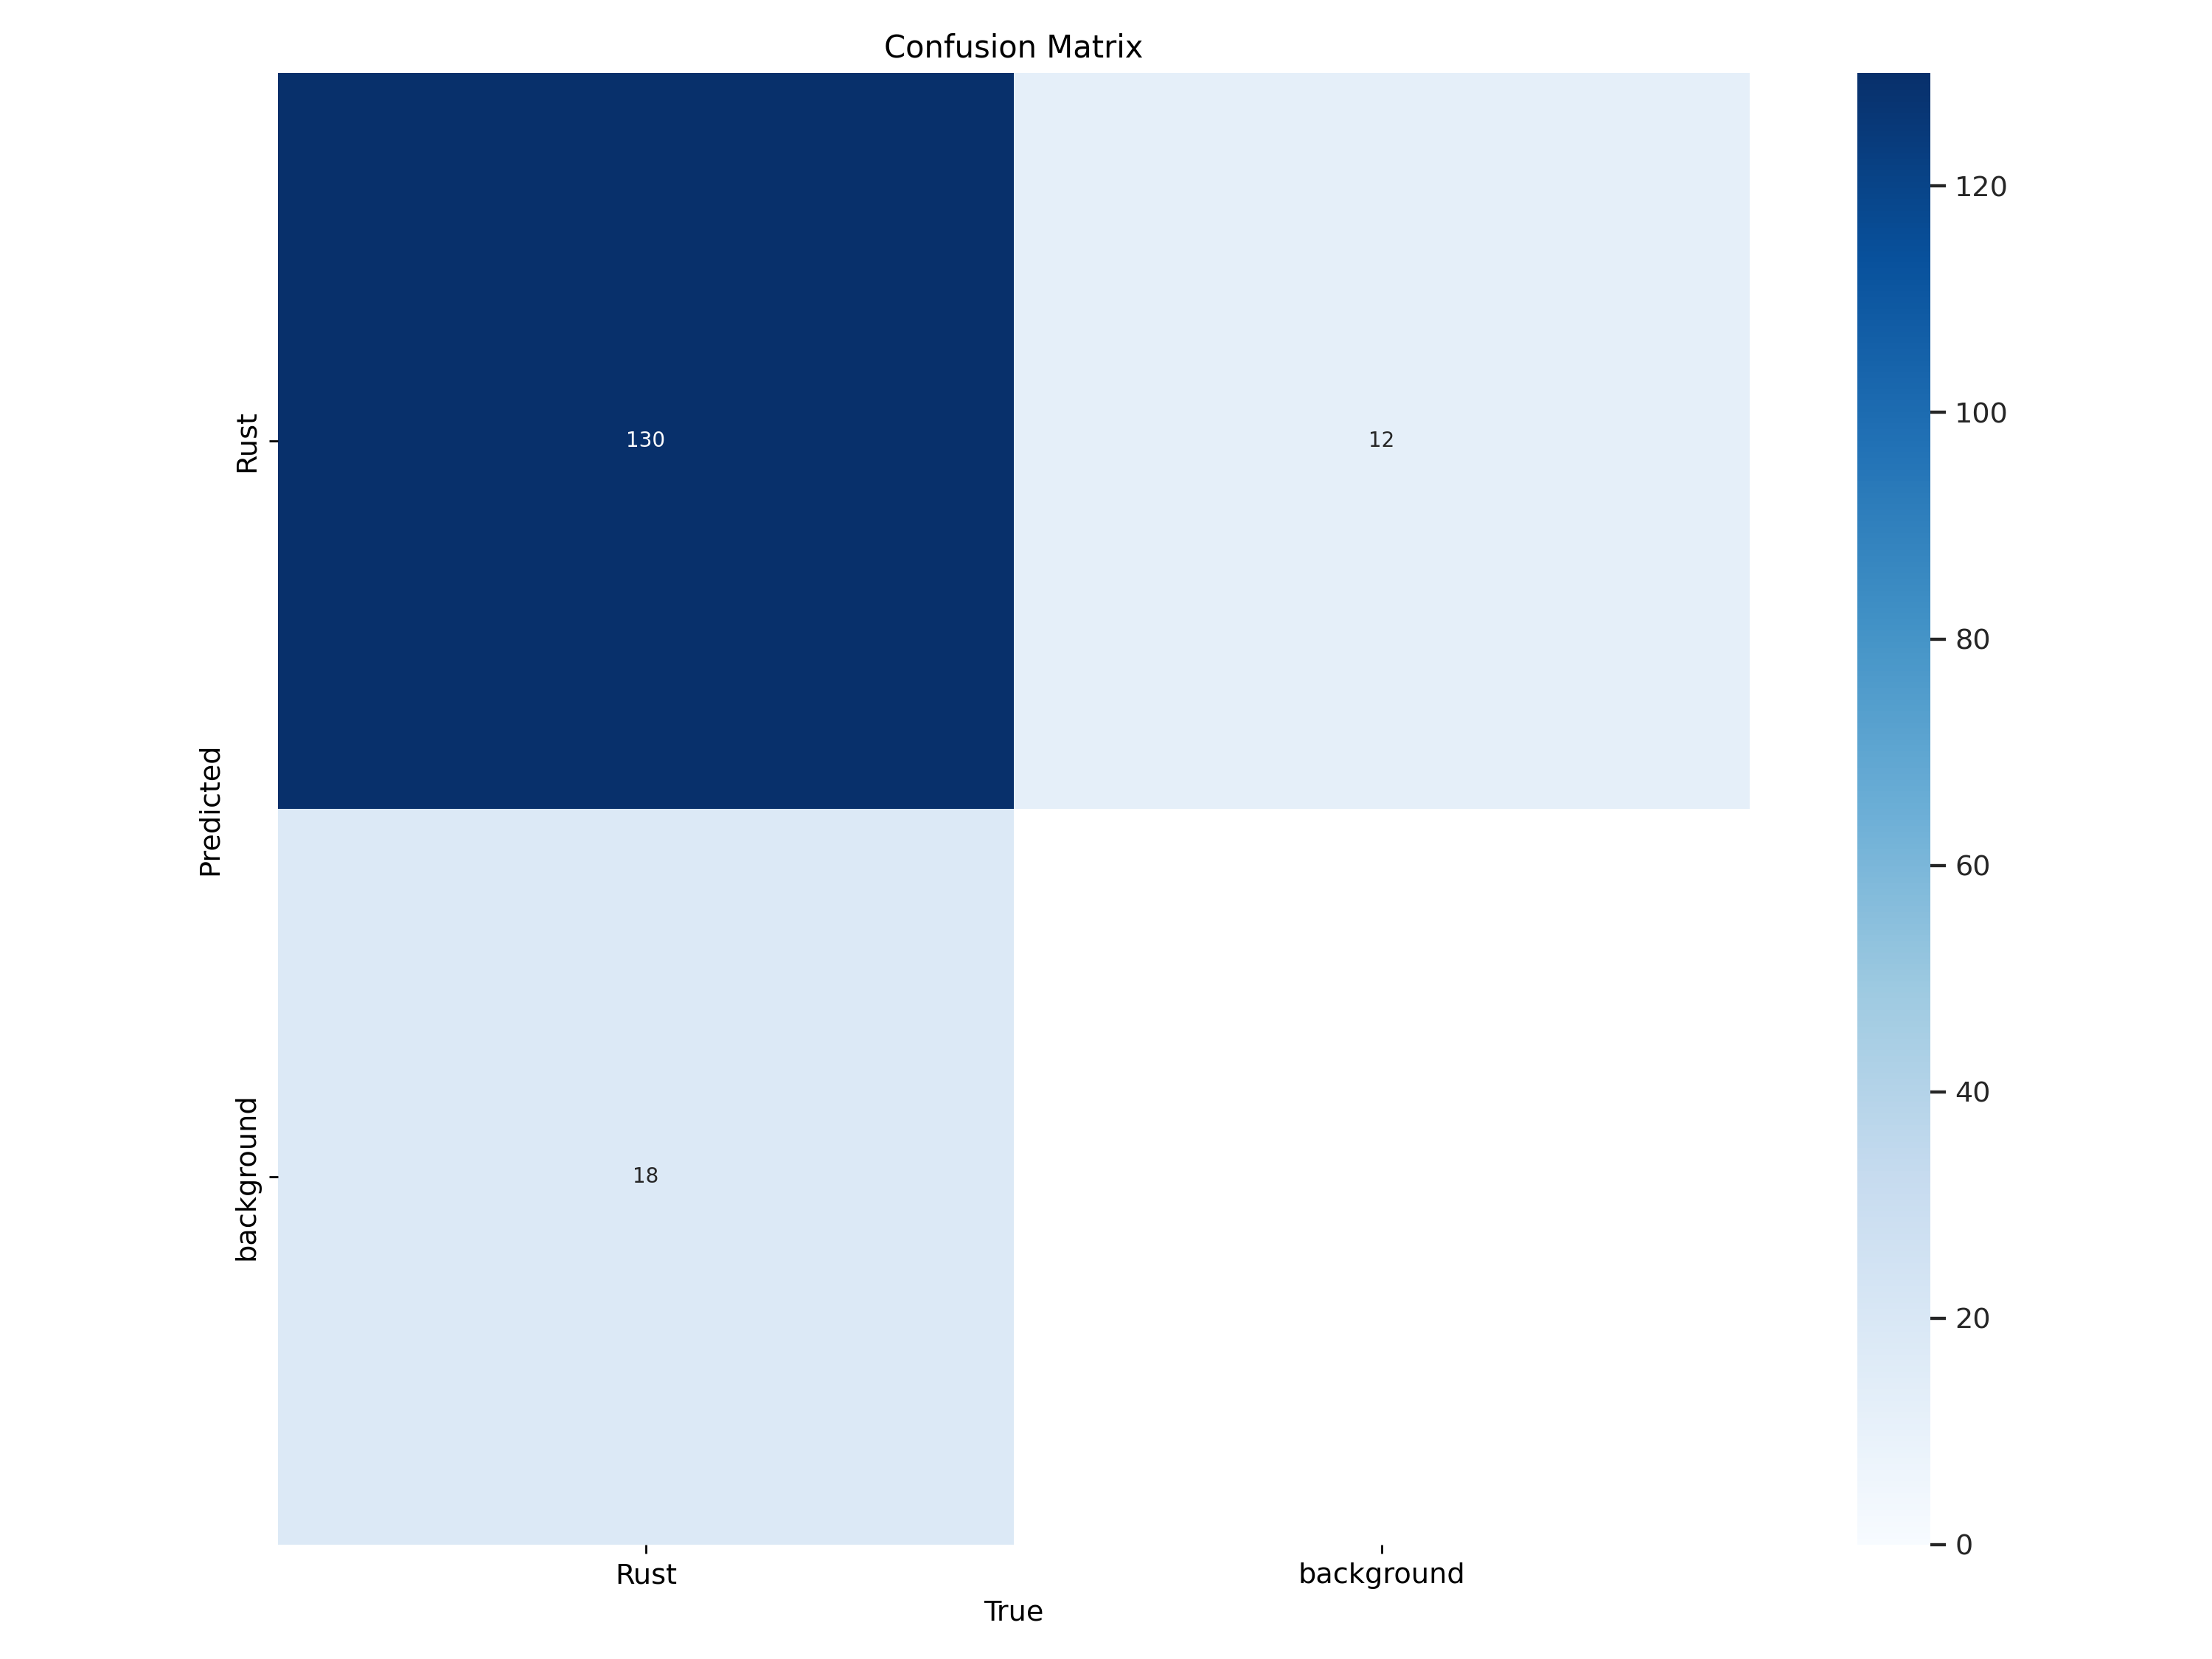

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


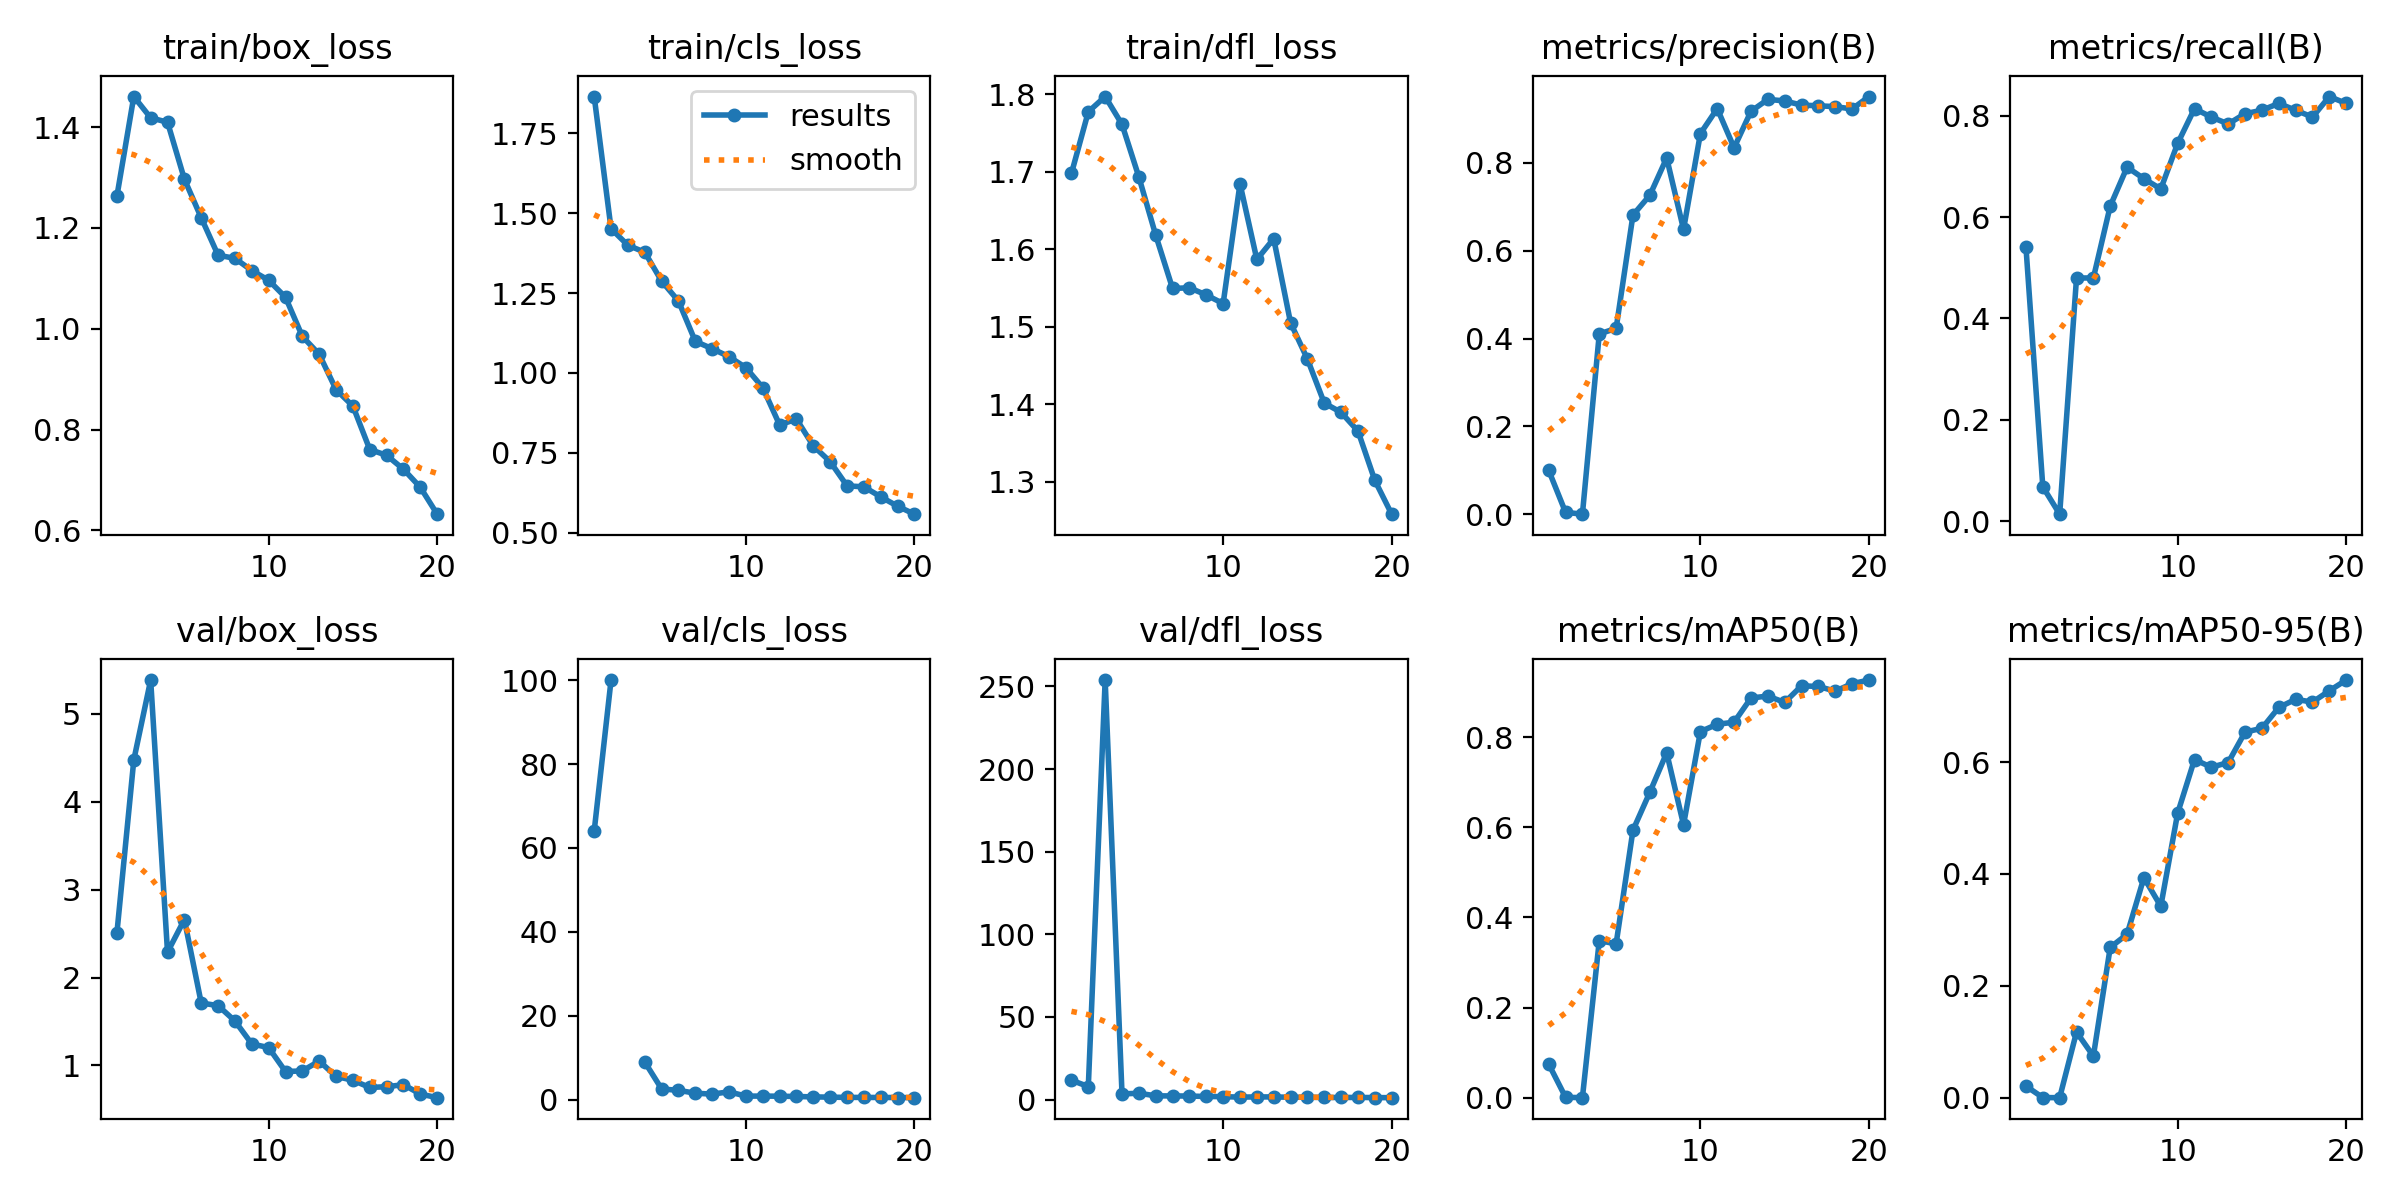

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


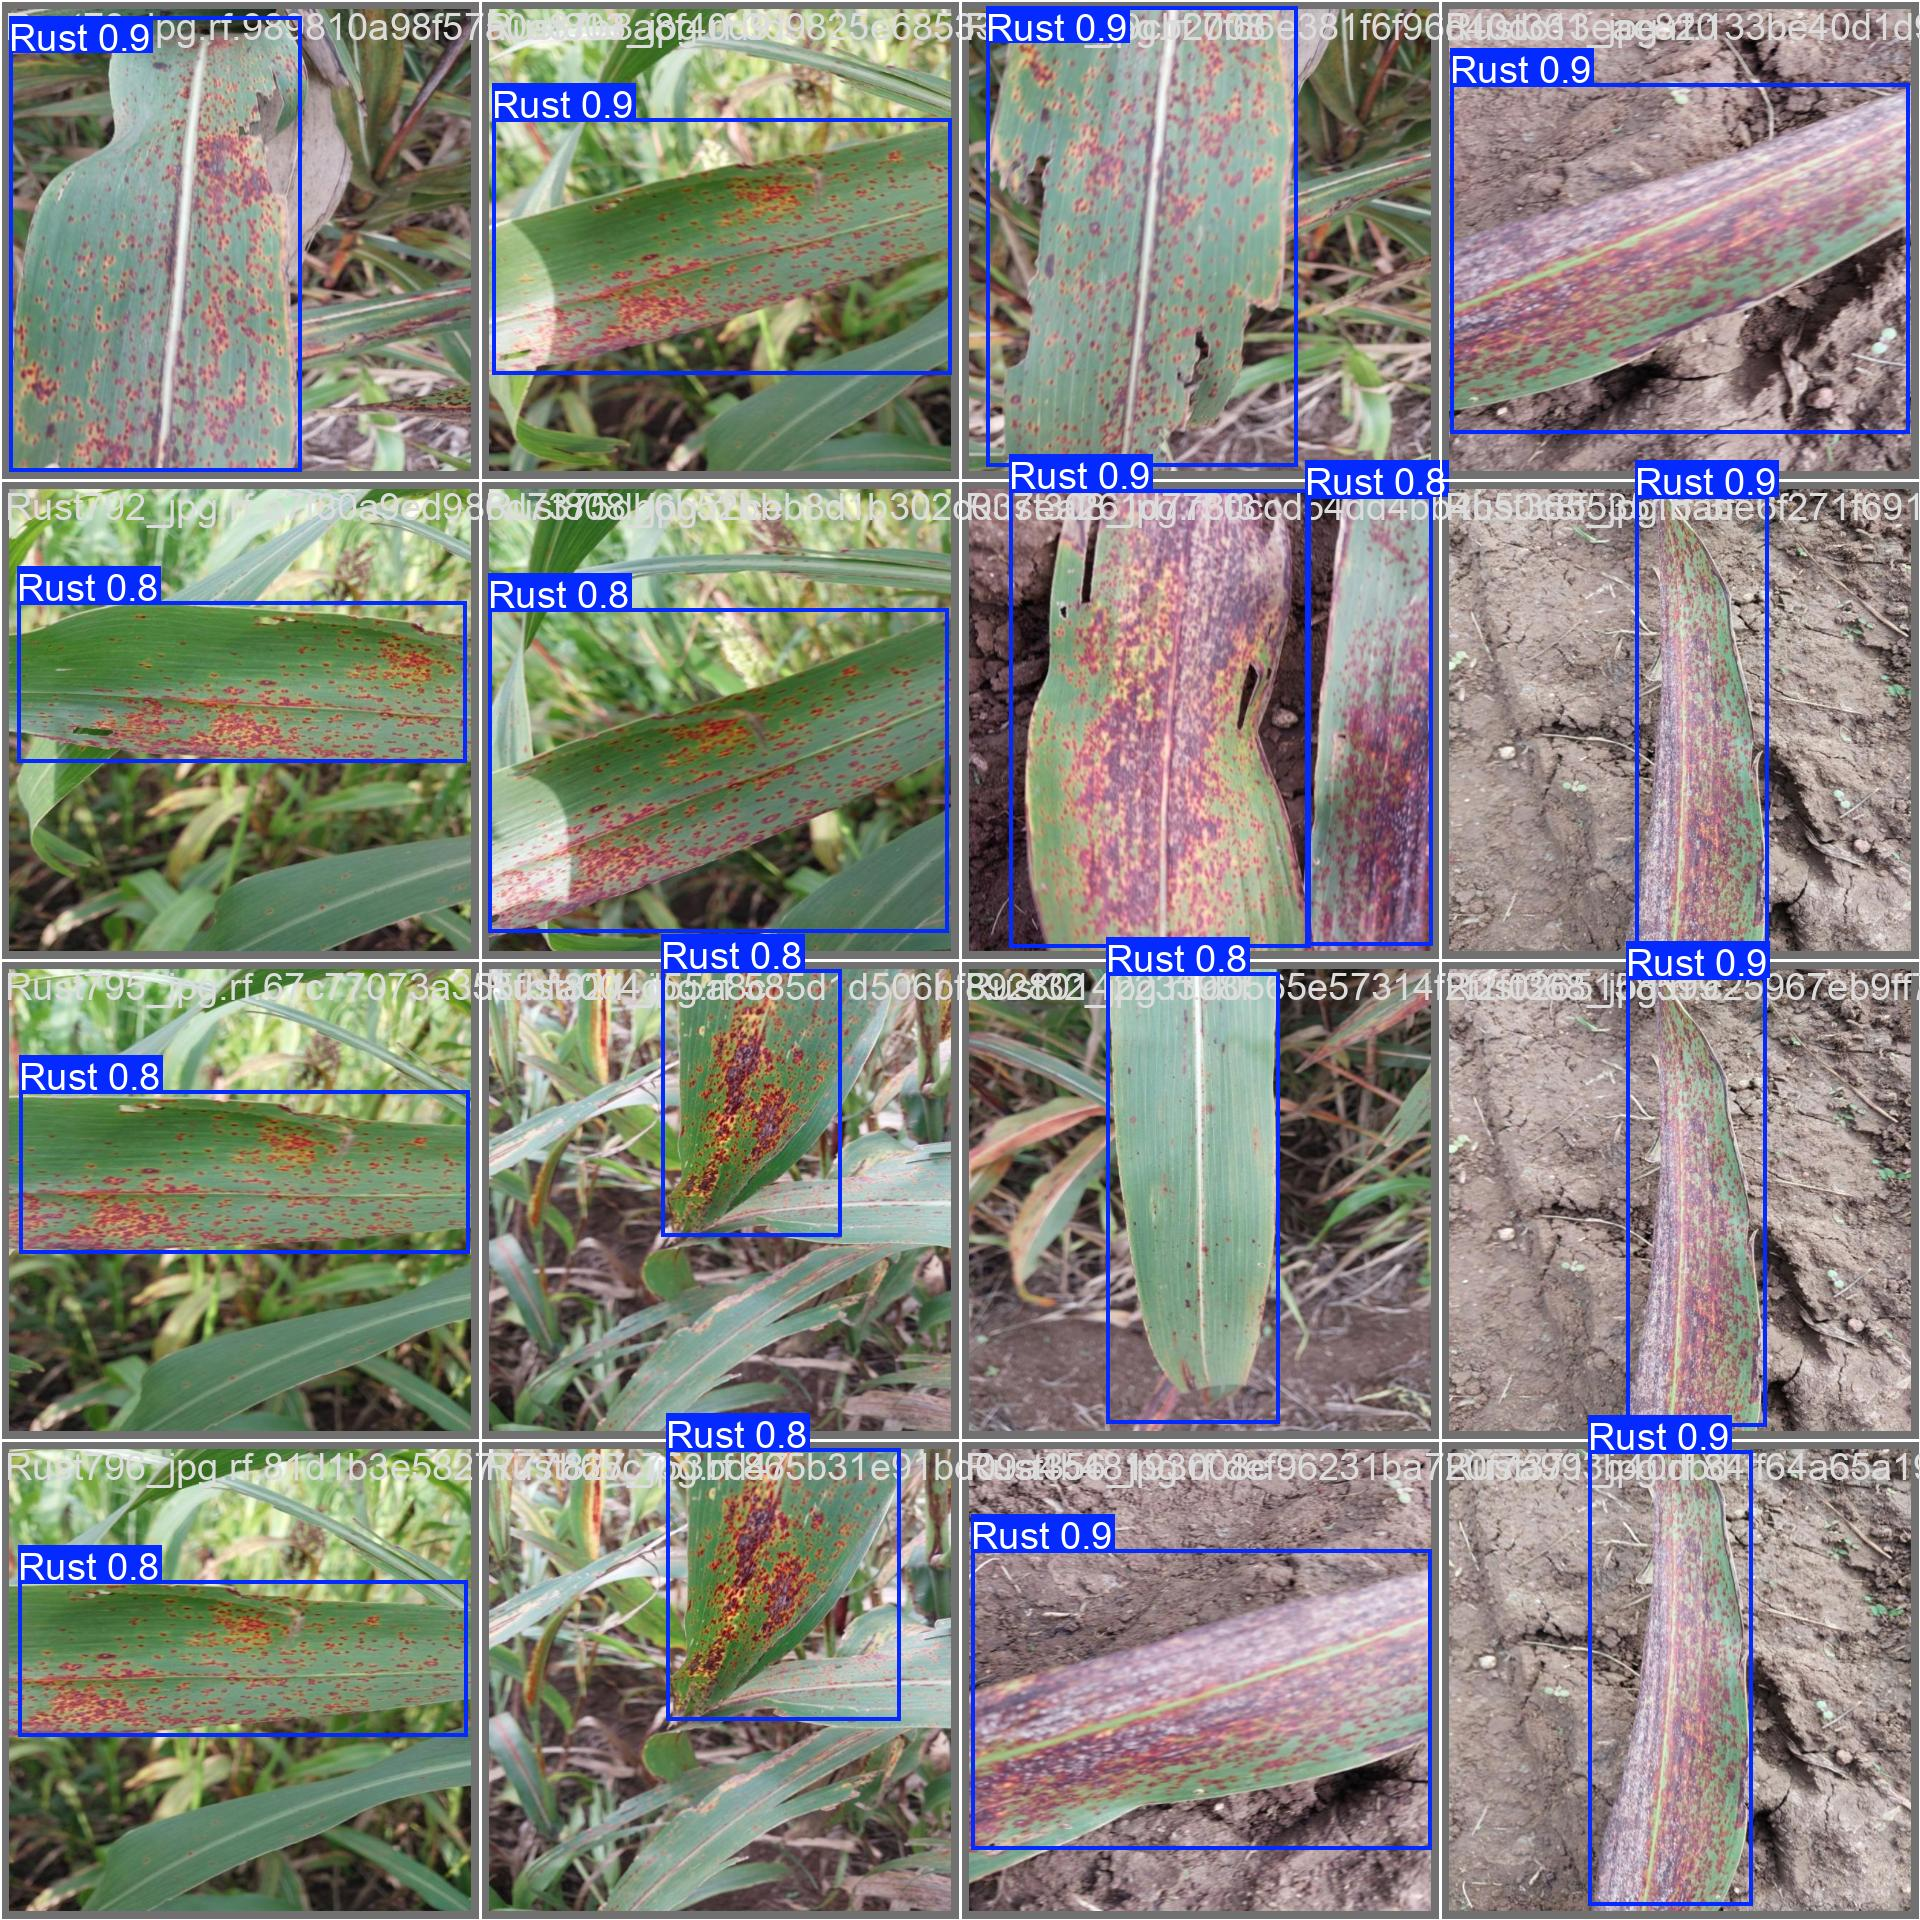

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/test-2/valid/labels.cache... 113 images, 0 backgrounds, 0 corrupt: 100% 113/113 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 35, len(boxes) = 148. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:05<00:00,  1.37it/s]
                   all        113        148      0.951      0.824      0.927      0.747
Speed: 5.9ms preprocess, 32.4ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/56 /content/test-2/test/images/Rust314_jpg.rf.a1f6111dc4b32f6a66041b946bc33295.jpg: 800x800 1 Rust, 58.8ms
image 2/56 /content/test-2/test/images/Rust316_jpg.rf.5ad917f8d518ad5ba52d8451dd3d2662.jpg: 800x800 1 Rust, 58.9ms
image 3/56 /content/test-2/test/images/Rust31_jpg.rf.2199b857a0d26a95340c4dec421ced9b.jpg: 800x800 2 Rusts, 55.8ms
image 4/56 /content/test-2/test/images/Rust347_jpg.rf.e8990d8273bf4c60c78b303ba50c78d8.jpg: 800x800 1 Rust, 52.0ms
image 5/56 /content/test-2/test/images/Rust351_jpg.rf.cd8fc8c4fc3bc31aef41e5c024b63ab6.jpg: 800x800 1 Rust, 52.0ms
image 6/56 /content/test-2/test/images/Rust354_jpg.rf.2730b0cccdccfe3d5b304f400812bec8.jpg: 800x800 1 Rust, 46.9ms
image 7/56 /content/test-2/test/images/Rust384_jpg.rf.8c4aa16d9833913ff267ce4ebc7fde31.jpg: 800x800 1 Rust, 31.4ms
image 8/56 /co

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch

In [ ]:
model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')
save_path = os.path.join(f'{HOME}/drive/MyDrive/YOLOv8', 'best.pt')
torch.save(model.model.state_dict(), save_path)

**NOTE:** Let's take a look at few results.

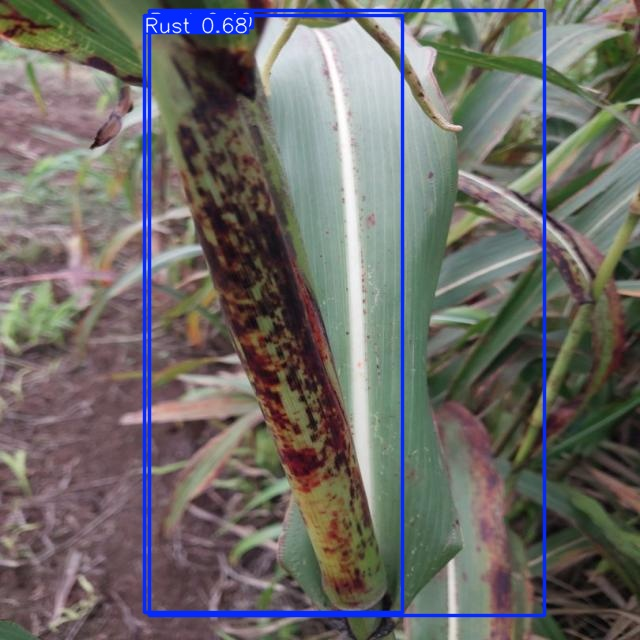

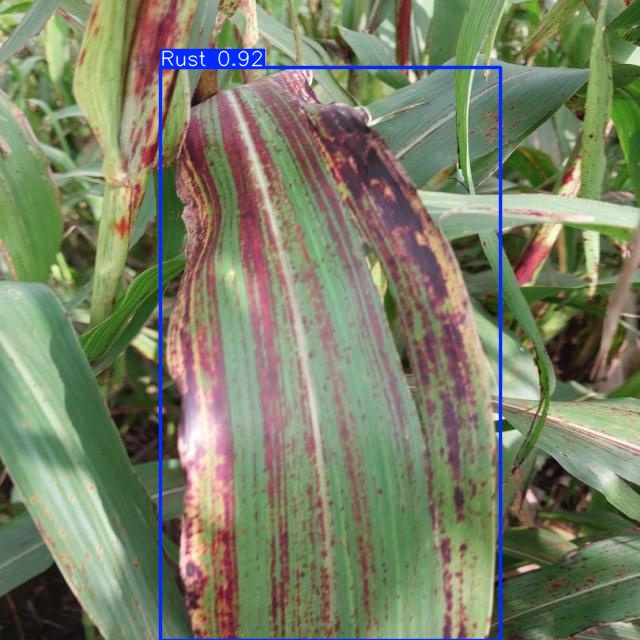

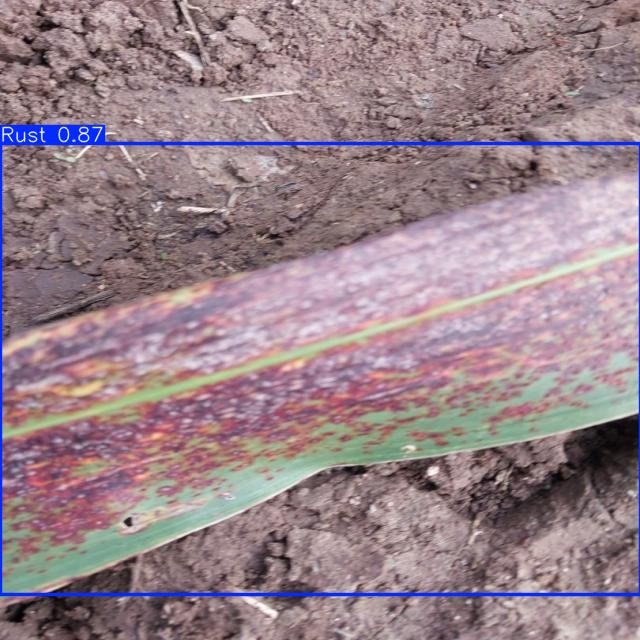

In [ ]:
import glob
from IPython.display import Image, display

base_path = '/content/runs/detect/'

subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]
latest_folder = max(subfolders, key=os.path.getmtime)
image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

### **Annoted data saving**

In [ ]:
model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')
model.predict(source=f'{dataset.location}/test/images', save=True, imgsz=800, conf=0.25)


image 1/56 /content/test-2/test/images/Rust314_jpg.rf.a1f6111dc4b32f6a66041b946bc33295.jpg: 800x800 1 Rust, 59.2ms
image 2/56 /content/test-2/test/images/Rust316_jpg.rf.5ad917f8d518ad5ba52d8451dd3d2662.jpg: 800x800 1 Rust, 58.8ms
image 3/56 /content/test-2/test/images/Rust31_jpg.rf.2199b857a0d26a95340c4dec421ced9b.jpg: 800x800 2 Rusts, 58.8ms
image 4/56 /content/test-2/test/images/Rust347_jpg.rf.e8990d8273bf4c60c78b303ba50c78d8.jpg: 800x800 1 Rust, 58.8ms
image 5/56 /content/test-2/test/images/Rust351_jpg.rf.cd8fc8c4fc3bc31aef41e5c024b63ab6.jpg: 800x800 1 Rust, 57.1ms
image 6/56 /content/test-2/test/images/Rust354_jpg.rf.2730b0cccdccfe3d5b304f400812bec8.jpg: 800x800 1 Rust, 32.3ms
image 7/56 /content/test-2/test/images/Rust384_jpg.rf.8c4aa16d9833913ff267ce4ebc7fde31.jpg: 800x800 1 Rust, 32.2ms
image 8/56 /content/test-2/test/images/Rust387_jpg.rf.505956be7f35eea71df0c5f313c9cbf0.jpg: 800x800 1 Rust, 32.9ms
image 9/56 /content/test-2/test/images/Rust398_jpg.rf.5c9aa59f74d42a86bf7a07616

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Rust'}
 obb: None
 orig_img: array([[[127, 129, 159],
         [136, 138, 168],
         [140, 142, 172],
         ...,
         [ 96,  90, 121],
         [ 77,  70, 103],
         [100,  93, 126]],
 
        [[145, 147, 177],
         [141, 143, 173],
         [132, 134, 164],
         ...,
         [ 92,  86, 117],
         [ 77,  70, 103],
         [ 99,  92, 125]],
 
        [[143, 145, 175],
         [134, 136, 166],
         [126, 128, 158],
         ...,
         [ 71,  65,  96],
         [ 67,  60,  93],
         [ 91,  84, 117]],
 
        ...,
 
        [[ 97,  97, 121],
         [ 89,  89, 113],
         [ 83,  83, 107],
         ...,
         [137, 134, 166],
         [141, 139, 169],
         [142, 140, 170]],
 
        [[ 86,  86, 110],
         [ 83,  83, 107],
         [ 81,  81, 105],
         ...,
         [129, 126, 


image 1/1 /content/sorgtest.jpg: 800x608 1 Rust, 45.5ms
Speed: 4.5ms preprocess, 45.5ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 608)
Results saved to runs/detect/predict2


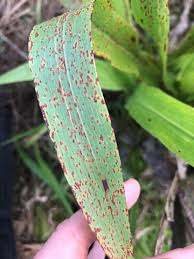

In [ ]:
model.predict(source=f'/content/sorgtest.jpg', save=True, imgsz=800, conf=0.25)
display(Image(filename='/content/sorgtest.jpg', width=600))

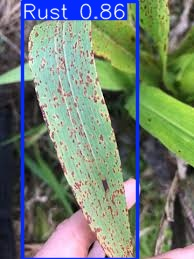

In [ ]:
display(Image(filename='/content/runs/detect/predict2/sorgtest.jpg', width=600))

In [ ]:
Dataset = "/content/drive/MyDrive/Sorghum Disease Image Dataset/Rust"

In [ ]:
import os
from ultralytics import YOLO
from IPython.display import display, Image

input_folder = Dataset
output_folder = "/content/drive/MyDrive/rust bounded"

os.makedirs(output_folder, exist_ok=True)

# Load your custom YOLO model
# model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

for img_name in os.listdir(input_folder):
    if img_name.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(input_folder, img_name)

        results = model.predict(source=img_path, save=True, imgsz=800, conf=0.25, save_dir=output_folder)

Streaming output truncated to the last 5000 lines.

image 1/1 /content/drive/MyDrive/Sorghum Disease Image Dataset/Rust/Rust716.jpg: 800x608 1 Rust, 26.5ms
Speed: 6.1ms preprocess, 26.5ms inference, 1.8ms postprocess per image at shape (1, 3, 800, 608)
Results saved to /content/drive/MyDrive/rust bounded/predictions167

image 1/1 /content/drive/MyDrive/Sorghum Disease Image Dataset/Rust/Rust738.jpg: 800x608 1 Rust, 27.6ms
Speed: 4.6ms preprocess, 27.6ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 608)
Results saved to /content/drive/MyDrive/rust bounded/predictions167

image 1/1 /content/drive/MyDrive/Sorghum Disease Image Dataset/Rust/Rust68.jpg: 800x608 1 Rust, 27.4ms
Speed: 6.3ms preprocess, 27.4ms inference, 2.3ms postprocess per image at shape (1, 3, 800, 608)
Results saved to /content/drive/MyDrive/rust bounded/predictions167

image 1/1 /content/drive/MyDrive/Sorghum Disease Image Dataset/Rust/Rust746.jpg: 800x608 1 Rust, 27.9ms
Speed: 6.9ms preprocess, 27.9ms inf

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/rust bounded/predictions'

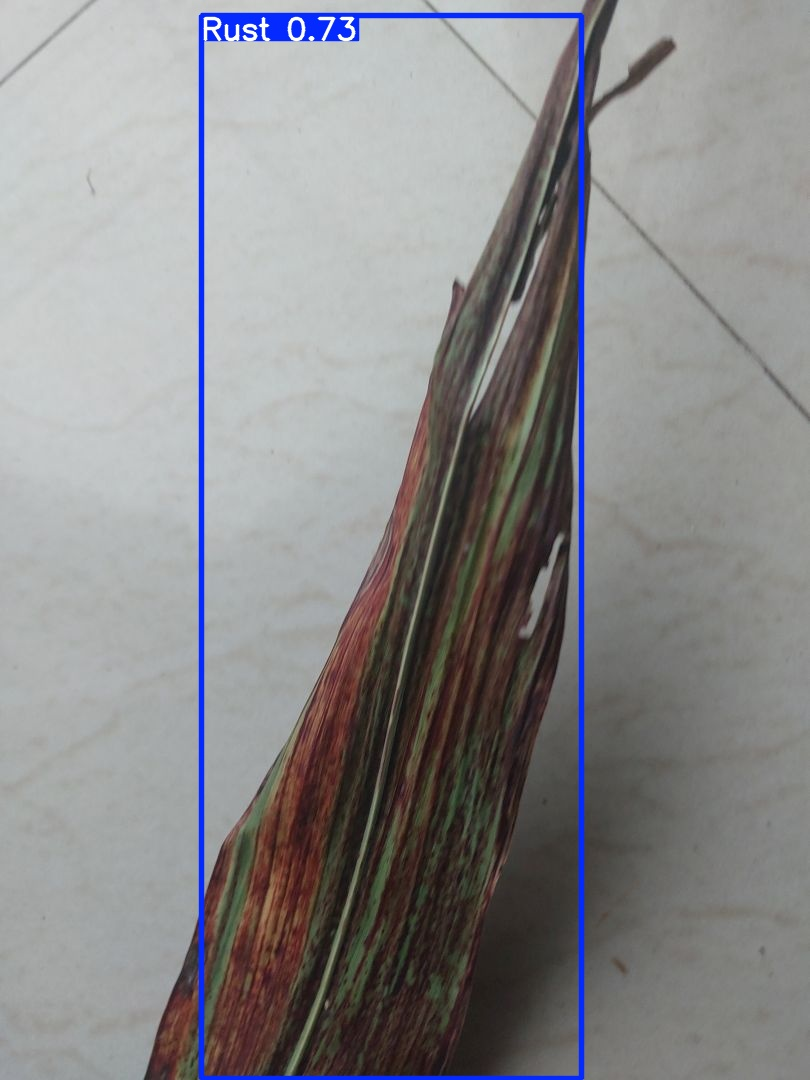

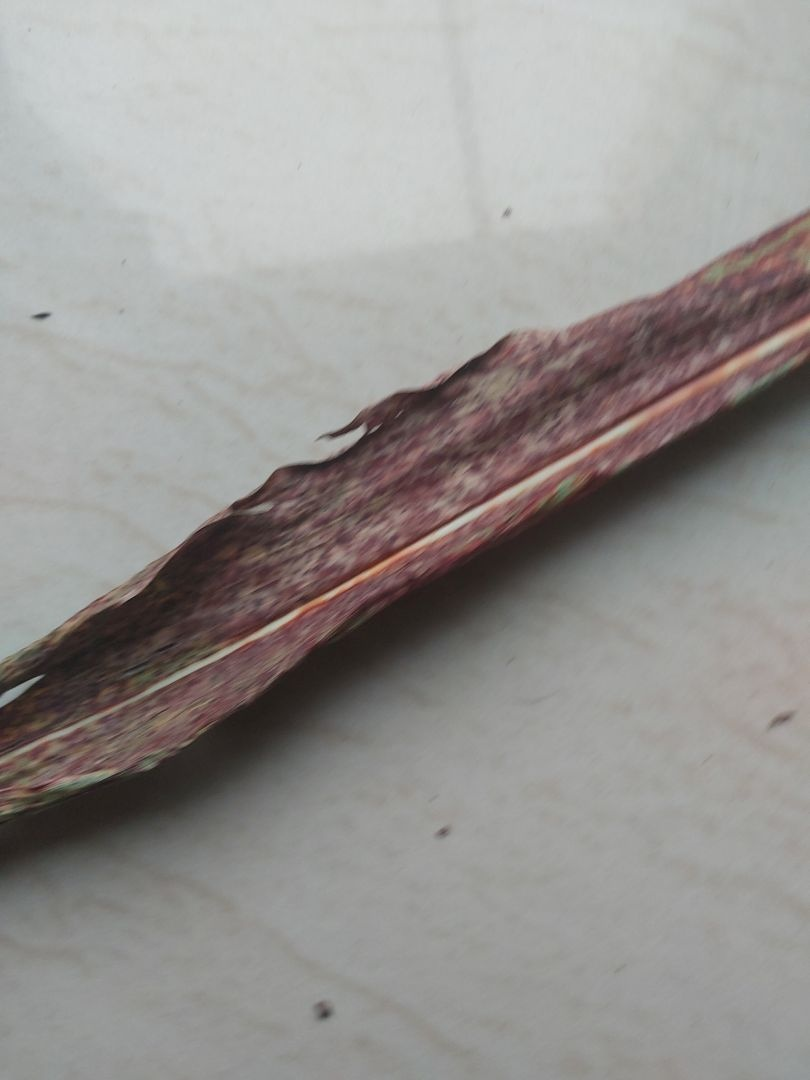

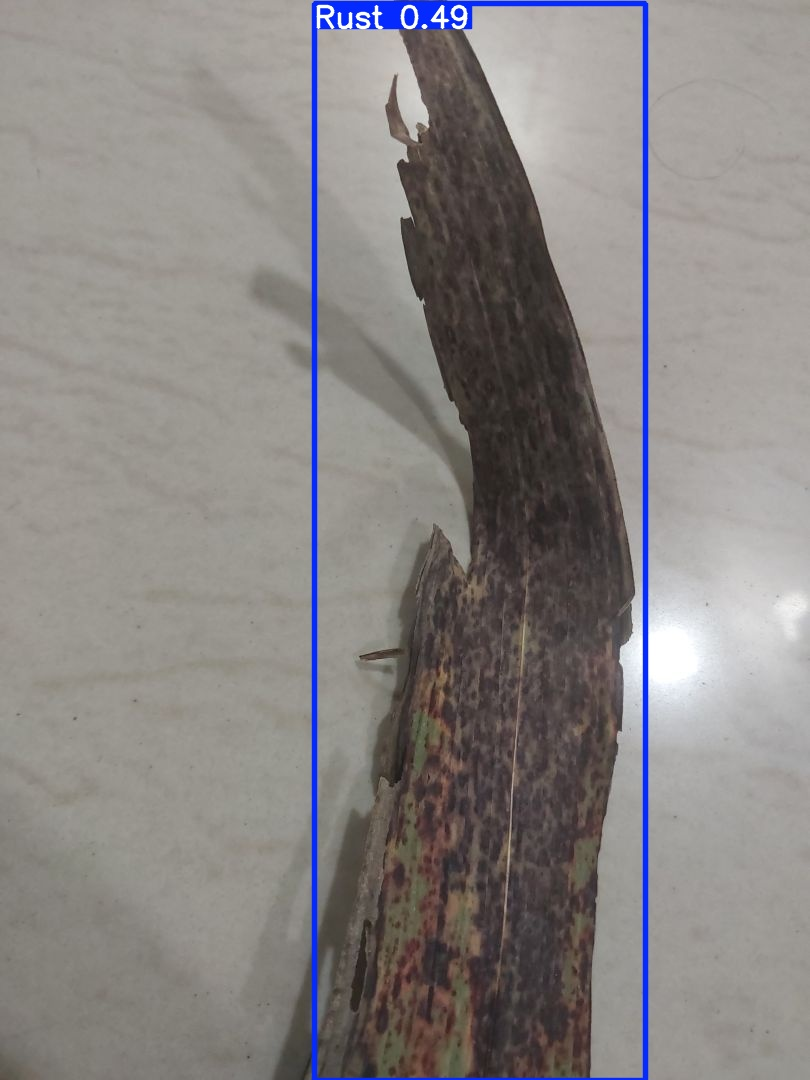

In [ ]:
# Display a few sample images from the output folder
sample_images = os.listdir(os.path.join(output_folder, "predictions167"))[:3]
for sample_img in sample_images:
    display(Image(filename=os.path.join(output_folder, "predictions167", sample_img), width=600))

### **IGNORE**

In [ ]:
import torch
model2 = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_mobilenet_v3_large', pretrained=True)
model2.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
import os
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

input_folder = "/path/to/sorghum_rust_images"
output_folder = "/path/to/output_folder"

os.makedirs(output_folder, exist_ok=True)
model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

for img_name in os.listdir(input_folder):
    if img_name.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(input_folder, img_name)

        results = model.predict(source=img_path, imgsz=800, conf=0.25)

        img = Image.open(img_path)

        for i, (box, score, cls) in enumerate(zip(results[0].boxes.xyxy, results[0].boxes.conf, results[0].boxes.cls)):
            x1, y1, x2, y2 = map(int, box)
            cropped_img = img.crop((x1, y1, x2, y2))

            output_path = os.path.join(output_folder, f"{os.path.splitext(img_name)[0]}_crop_{i}.jpg")
            cropped_img.save(output_path)

            display(cropped_img)

print("Cropping complete. Cropped images are saved and displayed.")
